# ------------------------- Personal Key Indicators of Heart Disease -------------------------

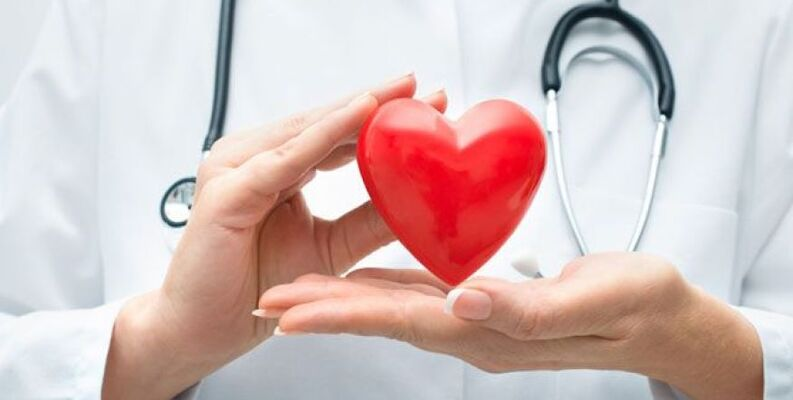

## -------------------------------------------------------- Description --------------------------------------------------------
##### * HeartDisease: Respondents that have ever reported having Coronary Heart Disease (CHD) or Myocardial Infarction (MI).
##### * BMI: Body Mass Index (BMI)
##### * Smoking: Have you smoked at least 100 cigarettes in your entire life?
##### * AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
##### * Stroke: Ever told you had a stroke?
##### * PhysicalHealth: For how many days did you have physical illness and injury during the past 30
##### * MentalHealth: For how many days during the past 30 days was your mental health not good?
##### * DiffWalking: Do you have serious difficulty walking or climbing stairs?
##### * Sex: Are you male or female?
##### * AgeCategory: Age category
##### * Race: Imputed race/ethnicity value
##### * Diabetic: Ever told you had diabetes?
##### * PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
##### * GenHealth: Would you say that in general your health is...
##### * SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
##### * Asthma: Ever told you had asthma?
##### * KidneyDisease: Were you ever told you had kidney disease (Not including kidney stones, bladder infection or incontinence)?
##### * SkinCancer: Ever told you had skin cancer?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.duplicated().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

# ---------------------------------------------------------------------------------------------------------------
### - One person dies every 34 seconds in the United States from Cardiovascular Disease.
### - About 697,000 people in the United States died from heart disease in 2020, that’s 1 in every 5 deaths (20%).

## => Coronary Artery Disease

##### * Coronary Heart Disease is the most common type of heart disease, killing 382,820 people in 2020.
##### * In 2020, about 2 in 10 deaths (20%) from CAD happen in adults less than 65 years old.

## => Heart Attack

##### * In the United States, someone has a heart attack every 40 seconds.
##### * Every year, about 805,000 people in the United States have a heart attack.  Of these, 605,000 are a first heart attack, 200,000 happen to people who have already had a heart attack.

### - Total Coronavirus Deaths in the United States in 2020: 372,168
# ---------------------------------------------------------------------------------------------------------------

In [ ]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
HeartDisease = df.HeartDisease.value_counts()
ax.pie(HeartDisease.values, labels = HeartDisease.index, explode=[0.05, 0.15], shadow = True,
       autopct = lambda pct: func(pct, HeartDisease.values), colors = ['#008fd5', '#fc4f30'],
       textprops = {'family':'sans-serif', 'fontsize':'x-large', 'fontstyle':'italic', 'fontweight':'heavy'})
plt.title('Distribution of Heart Disease', size = 24)
plt.show()

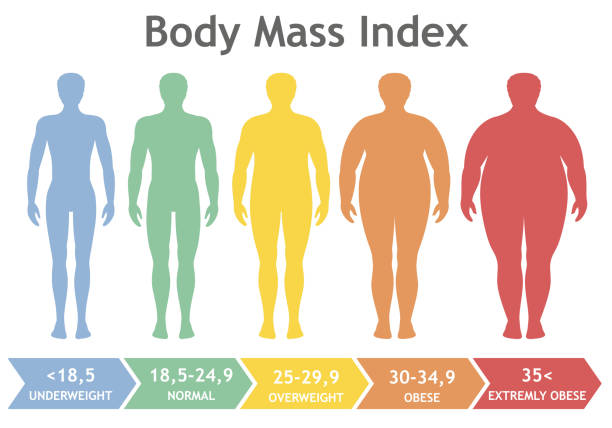

In [ ]:
fig, ax = plt.subplots(figsize = (18, 8))
n, bins, patches = plt.hist(df.BMI, bins=90, facecolor='#e0e0e0', edgecolor='#2ab0ff', linewidth=0.5, alpha=0.7)

n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
for i in range(25, 90):
    patches[i].set_fc('#d65c5b')
    patches[i].set_alpha(1)
for i in range(19, 25):
    patches[i].set_fc('#e4985e')
    patches[i].set_alpha(1)
for i in range(14, 19):
    patches[i].set_fc('#f9d648')
    patches[i].set_alpha(1)
for i in range(7, 14):
    patches[i].set_fc('#8fc69f')
    patches[i].set_alpha(1)
for i in range(0, 7):
    patches[i].set_fc('#93b4d7')
    patches[i].set_alpha(1)

# plt.axvline(x = 18.5, color = 'g');
# plt.axvline(x = 25, color = 'y');
# plt.axvline(x = 30, color = 'brown');
# plt.axvline(x = 35, color = 'r');

plt.title('Body Mass Index Distribution', size = 32)
plt.xlabel('Body Mass Index', size = 20)
plt.ylabel('Frequancy', size = 20)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

In [ ]:
df_normal_weight  = df[df['BMI'] >= 18.5]
df_normal_weight  = df_normal_weight [df_normal_weight ['BMI'] < 25]
df_normal_weight.HeartDisease.value_counts()

In [ ]:
df_Underweight = df[df['BMI'] < 18.5]
df_Underweight.HeartDisease.value_counts()

In [ ]:
df_Overweight = df[df['BMI'] >= 25]
df_Overweight = df_Overweight[df_Overweight['BMI'] < 30]
df_Overweight.HeartDisease.value_counts()

In [ ]:
df_Obese = df[df['BMI'] >= 30]
df_Obese = df_Obese[df_Obese['BMI'] < 35]
df_Obese.HeartDisease.value_counts()

In [ ]:
df_Extremly_Obese = df[df['BMI'] >= 35]
df_Extremly_Obese.HeartDisease.value_counts()

In [ ]:
df_BMI = {'Normal Weight': 0.06482004705592258, 'Underweight': 0.07847358121330725, 'Overweight': 0.08689173173452315,
          'Obese': 0.10352593158070518, 'Extremly Obese': 0.10873075162059907}
df_BMI = pd.Series(df_BMI)
df_BMI = pd.DataFrame(df_BMI, columns = ['Heart Disease Percentage'])
df_BMI

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(df_BMI.index, df_BMI['Heart Disease Percentage'], color = ['#93b4d7', '#8fc69f', '#f9d648', '#e4985e', '#d65c5b'])
plt.title('Heart Disease Distribution', size = 36)
plt.xlabel('Body Mass Index Level', size = 22)
plt.ylabel('Heart Disease Percentage', size = 22)
plt.xticks(size = 20)
plt.yticks(size = 16)
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(24,16))
fig.suptitle('Distribution of Heart Disease over BMI Levels', size = 25)

axes[0][0].bar(df_BMI.index, df_BMI['Heart Disease Percentage'],
               color = ['#93b4d7', '#8fc69f', '#f9d648', '#e4985e', '#d65c5b']);
axes[0][0].set_title('Heart Disease Distribution', fontsize = 20);
axes[0][0].tick_params(labelsize = 13, labelrotation = 30)

normal_weight = df_normal_weight.HeartDisease.value_counts()
axes[1][0].pie(normal_weight.values, labels = normal_weight.index, explode=[0.05, 0.3], shadow = True,
       autopct = lambda pct: func(pct, normal_weight.values), colors = ['#93b4d7', 'silver'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[1][0].set_title('Normal Weight', fontsize = 20);

Underweight = df_Underweight.HeartDisease.value_counts()
axes[0][1].pie(Underweight.values, labels = Underweight.index, explode=[0.05, 0.3], shadow = True,
       autopct = lambda pct: func(pct, Underweight.values), colors = ['#8fc69f', 'silver'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[0][1].set_title('Underweight', fontsize = 20);

Overweight = df_Overweight.HeartDisease.value_counts()
axes[1][1].pie(Overweight.values, labels = Overweight.index, explode=[0.05, 0.3], shadow = True,
       autopct = lambda pct: func(pct, Overweight.values), colors = ['#f9d648', 'silver'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[1][1].set_title('Overweight', fontsize = 20);

Obese = df_Obese.HeartDisease.value_counts()
axes[0][2].pie(Obese.values, labels = Obese.index, explode=[0.05, 0.3], shadow = True,
       autopct = lambda pct: func(pct, Obese.values), colors = ['#e4985e', 'silver'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'})
axes[0][2].set_title('Obese', fontsize = 20);

Extremly_Obese = df_Extremly_Obese.HeartDisease.value_counts()
axes[1][2].pie(Extremly_Obese.values, labels = Extremly_Obese.index, explode=[0.05, 0.3], shadow = True,
       autopct = lambda pct: func(pct, Extremly_Obese.values), colors = ['#d65c5b', 'silver'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[1][2].set_title('Extremly Obese', fontsize = 20);

##### * 6.5% of people with Normal Body Mass Index (18.5 to 24.9) have HeartDisease.
##### * 7.8% of people with low Body Mass Index (Underweight) have HeartDisease.
##### * 8.7% of people with high Body Mass Index (Overweight) have HeartDisease.
##### * 10% of people with very high Body Mass Index (Obese) have HeartDisease.
##### * 10.9% of people with extremly high Body Mass Index (Extremly Obese) have HeartDisease.

In [ ]:
df.groupby(['Smoking', 'HeartDisease']).BMI.count()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (16,8))
fig.suptitle('Distribution of Heart Disease', size = 36)

df_Smokers = df[df.Smoking == 'Yes']
Smokers = df_Smokers.HeartDisease.value_counts()
axes[0].pie(Smokers.values, labels = Smokers.index, explode=[0.05, 0.2], shadow = True,
       autopct = lambda pct: func(pct, Smokers.values), colors = ['chocolate', 'wheat'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[0].set_title('Smokers', fontsize = 20);

df_Non_Smokers = df[df.Smoking == 'No']
Non_Smokers = df_Non_Smokers.HeartDisease.value_counts()
axes[1].pie(Non_Smokers.values, labels = Non_Smokers.index, explode=[0.05, 0.3], shadow = True,
       autopct = lambda pct: func(pct, Non_Smokers.values), colors = ['chocolate', 'wheat'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[1].set_title('Non-Smokers', fontsize = 20);

In [ ]:
df_Smoking = {'Smokers': 0.12157715983867544, 'Non-Smokers': 0.0603341370078824}
df_Smoking = pd.Series(df_Smoking)
df_Smoking = pd.DataFrame(df_Smoking, columns = ['Heart Disease Percentage'])
df_Smoking

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(df_Smoking.index, df_Smoking['Heart Disease Percentage'], color = ['chocolate', 'wheat'])
plt.title('Heart Disease Distribution', size = 24)
plt.xlabel('Smoking Status', size = 20)
plt.ylabel('Heart Disease Percentage', size = 20)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

##### * 12.2% of Smokers have HeartDisease.
##### * 6% of Non-Smokers have HeartDisease.

In [ ]:
df.groupby(['AlcoholDrinking', 'HeartDisease']).BMI.count()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (16,8))
fig.suptitle('Distribution of Heart Disease', size = 36)

df_Drinkers = df[df.AlcoholDrinking == 'Yes']
Drinkers = df_Drinkers.HeartDisease.value_counts()
axes[0].pie(Drinkers.values, labels = Drinkers.index, explode=[0.05, 0.3], shadow = True,
       autopct = lambda pct: func(pct, Drinkers.values), colors = ['#479c9e', '#495084'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[0].set_title('Heavy Drinkers', fontsize = 20);

df_Non_Drinkers = df[df.AlcoholDrinking == 'No']
Non_Drinkers = df_Non_Drinkers.HeartDisease.value_counts()
axes[1].pie(Non_Drinkers.values, labels = Non_Drinkers.index, explode=[0.05, 0.2], shadow = True,
       autopct = lambda pct: func(pct, Non_Drinkers.values), colors = ['#479c9e', '#495084'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[1].set_title('Non Heavy Drinkers', fontsize = 20);

In [ ]:
df_Drinking = {'Heavy Drinkers': 0.05239472838315654, 'Non Heavy Drinkers': 0.08802152890093887}
df_Drinking = pd.Series(df_Drinking)
df_Drinking = pd.DataFrame(df_Drinking, columns = ['Heart Disease Percentage'])
df_Drinking

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(df_Drinking.index, df_Drinking['Heart Disease Percentage'], color = ['#479c9e', '#495084'])
plt.title('Heart Disease Distribution', size = 24)
plt.xlabel('Drinking Status', size = 20)
plt.ylabel('Heart Disease Percentage', size = 20)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

##### * 5.2% of Heavy Drinkers have HeartDisease.
##### * 8.8% of Non Heavy Drinkers have HeartDisease.

In [ ]:
df.groupby(['Stroke', 'HeartDisease']).BMI.count()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (16,8))
fig.suptitle('Distribution of Heart Disease', size = 36)

df_Stroke = df[df.Stroke == 'Yes']
Stroke = df_Stroke.HeartDisease.value_counts()
axes[0].pie(Stroke.values, labels = Stroke.index, explode=[0.03, 0.03], shadow = True,
       autopct = lambda pct: func(pct, Stroke.values), colors = ['firebrick', 'lightcoral'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[0].set_title('Stroke', fontsize = 20);

df_No_Stroke = df[df.Stroke == 'No']
No_Stroke = df_No_Stroke.HeartDisease.value_counts()
axes[1].pie(No_Stroke.values, labels = No_Stroke.index, explode=[0.05, 0.3], shadow = True,
       autopct = lambda pct: func(pct, No_Stroke.values), colors = ['firebrick', 'lightcoral'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[1].set_title('No Stroke', fontsize = 20);

In [ ]:
df_Stroke = {'Stroke': 0.3636589609743972, 'No Stroke': 0.07468982146454964}
df_Stroke = pd.Series(df_Stroke)
df_Stroke = pd.DataFrame(df_Stroke, columns = ['Heart Disease Percentage'])
df_Stroke

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(df_Stroke.index, df_Stroke['Heart Disease Percentage'], color = ['firebrick', 'lightcoral'])
plt.title('Heart Disease Distribution', size = 24)
plt.xlabel('Stroke Status', size = 20)
plt.ylabel('Heart Disease Percentage', size = 20)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

##### * 36.4% of people who have/had Strokes have HeartDisease.
##### * 7.5% of people who never have Strokes HeartDisease.

In [ ]:
fig, ax = plt.subplots(figsize = (20,8))
sns.kdeplot(df[df["HeartDisease"]=='Yes']["PhysicalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='No']["PhysicalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of PhysicalHealth state for the last 30 days', fontsize = 18)
ax.set_xlabel("PhysicalHealth", size = 20)
ax.set_ylabel("Frequency", size = 20)
ax.legend();
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (20,8))
sns.kdeplot(df[df["HeartDisease"]=='Yes']["MentalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='No']["MentalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of MentalHealth state for the last 30 days', fontsize = 18)
ax.set_xlabel("MentalHealth", size = 20)
ax.set_ylabel("Frequency", size = 20)
ax.legend();
plt.show()

In [ ]:
df.groupby(['DiffWalking', 'HeartDisease']).BMI.count()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (16,8))
fig.suptitle('Distribution of Heart Disease', size = 36)

df_DiffWalking = df[df.DiffWalking == 'Yes']
DiffWalking = df_DiffWalking.HeartDisease.value_counts()
axes[0].pie(DiffWalking.values, labels = DiffWalking.index, explode=[0.05, 0.05], shadow = True,
       autopct = lambda pct: func(pct, DiffWalking.values), colors = ['#AEDBCE', '#839AA8'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[0].set_title('Difficulty with Walking', fontsize = 20);

df_No_DiffWalking = df[df.DiffWalking == 'No']
No_DiffWalking = df_No_DiffWalking.HeartDisease.value_counts()
axes[1].pie(No_DiffWalking.values, labels = No_DiffWalking.index, explode=[0.05, 0.3], shadow = True,
       autopct = lambda pct: func(pct, No_DiffWalking.values), colors = ['#AEDBCE', '#839AA8'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[1].set_title('No Difficulty with Walking', fontsize = 20);

In [ ]:
df_DiffWalking = {'With Difficulties': 0.22580499887412744, 'Without Difficulties': 0.0629845489042613}
df_DiffWalking = pd.Series(df_DiffWalking)
df_DiffWalking = pd.DataFrame(df_DiffWalking, columns = ['Heart Disease Percentage'])
df_DiffWalking

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(df_DiffWalking.index, df_DiffWalking['Heart Disease Percentage'], color = ['#AEDBCE', '#839AA8'])
plt.title('Heart Disease Distribution', size = 24)
plt.xlabel('Walking Status', size = 20)
plt.ylabel('Heart Disease Percentage', size = 20)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

##### * 22.6% of people who have serious difficulties walking or climbing stairs have HeartDisease.
##### * 6.3% of people who don't have serious difficulties walking or climbing stairs HeartDisease.

In [ ]:
df.groupby(['Sex', 'HeartDisease']).BMI.count()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (16,8))
fig.suptitle('Distribution of Heart Disease', size = 36)

df_Males = df[df.Sex == 'Male']
Males = df_Males.HeartDisease.value_counts()
axes[0].pie(Males.values, labels = Males.index, explode=[0.05, 0.2], shadow = True,
       autopct = lambda pct: func(pct, Males.values), colors = ['steelblue', 'silver'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[0].set_title('Males', fontsize = 20);

df_Females = df[df.Sex == 'Female']
Females = df_Females.HeartDisease.value_counts()
axes[1].pie(Females.values, labels = Females.index, explode=[0.05, 0.3], shadow = True,
       autopct = lambda pct: func(pct, Females.values), colors = ['hotpink', 'silver'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[1].set_title('Females', fontsize = 20);

In [ ]:
df_Sex = {'Male': 0.10618461740904007, 'Female': 0.06694675367241738}
df_Sex = pd.Series(df_Sex)
df_Sex = pd.DataFrame(df_Sex, columns = ['Heart Disease Percentage'])
df_Sex

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(df_Sex.index, df_Sex['Heart Disease Percentage'], color = ['steelblue', 'hotpink'])
plt.title('Heart Disease Distribution', size = 24)
plt.xlabel('Gender', size = 20)
plt.ylabel('Heart Disease Percentage', size = 20)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

##### * 10.6% of Males have HeartDisease.
##### * 6.7% of Females have HeartDisease.

In [ ]:
df.AgeCategory.value_counts().sort_index()

In [ ]:
df.groupby(['AgeCategory', 'HeartDisease']).BMI.count()

In [ ]:
df_AgeCategory = {'18-24': 0.006171667299658184, '25-29': 0.00784429371866706, '30-34': 0.01205140510851597,
                  '35-39': 0.01440389294403893, '40-44': 0.02313624678663239, '45-49': 0.034142535909320364,
                  '50-54': 0.054487432038452445, '55-59': 0.07399939510031253, '60-64': 0.09876506560588968,
                  '65-69': 0.12008433135193698, '70-74': 0.15602768388862062, '75-79': 0.18848338143562052,
                  '80 or older': 0.2256034447066617}
df_AgeCategory = pd.Series(df_AgeCategory)
df_AgeCategory = pd.DataFrame(df_AgeCategory, columns = ['Heart Disease Percentage'])
df_AgeCategory

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(df_AgeCategory.index, df_AgeCategory['Heart Disease Percentage'], color = ['white', 'whitesmoke', 'gainsboro',
                                                                                  'lightgrey', 'lightgray', 'silver',
                                                                                  'darkgrey', 'darkgray', 'grey', 'gray',
                                                                                  'dimgrey', 'dimgray', 'black'])
plt.title('Heart Disease Distribution', size = 36)
plt.xlabel('Age Category', size = 22)
plt.ylabel('Heart Disease Percentage', size = 22)
plt.xticks(size = 20, rotation = 90)
plt.yticks(size = 16)
plt.show()

In [ ]:
df.groupby(['Race', 'HeartDisease']).BMI.count()

In [ ]:
df_Race = {'American Indian/Alaskan Native': 0.10419069588619762, 'White': 0.09178588323573071, 'Black': 0.07537381751602075,
           'Hispanic': 0.052575967354077095, 'Asian': 0.032969757064947945, 'Other': 0.08107613469985359}
df_Race = pd.Series(df_Race)
df_Race = pd.DataFrame(df_Race, columns = ['Heart Disease Percentage'])

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(df_Race.index, df_Race['Heart Disease Percentage'],color= ['#DD5353', '#FFE7CC','#472D2D','#FF9551','#7FB77E','#B7C4CF'])
plt.title('Heart Disease Distribution', size = 36)
plt.xlabel('Race', size = 22)
plt.ylabel('Heart Disease Percentage', size = 22)
plt.xticks(size = 20, rotation = 90)
plt.yticks(size = 16)
plt.show()

##### * 10.4% of American Indian/Alaskan Native have Heart Disease.
##### * 9.2% White have Heart Disease.
##### * 7.5% of Black have Heart Disease.
##### * 5.3% ofHispanic have Heart Disease.
##### * 3.3% of Asian have Heart Disease.
##### * 8.1% of Other have Heart Disease.

In [ ]:
df.groupby(['Diabetic', 'HeartDisease']).BMI.count()

In [ ]:
df_Diabetic = {'No diabetes': 0.06496868197275758, 'Level 1 diabetes': 0.11635451998230349,
               'Level 2 diabetes': 0.21952355276702123, 'During pregnancy': 0.04220398593200469}
df_Diabetic = pd.Series(df_Diabetic)
df_Diabetic = pd.DataFrame(df_Diabetic, columns = ['Heart Disease Percentage'])
df_Diabetic

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(df_Diabetic.index, df_Diabetic['Heart Disease Percentage'], color = ['#3c93b3', '#1f6282', '#003653', '#5cc6e3'])
plt.title('Heart Disease Distribution', size = 36)
plt.xlabel('Diabetes Status', size = 22)
plt.ylabel('Heart Disease Percentage', size = 22)
plt.xticks(size = 20)
plt.yticks(size = 16)
plt.show()

##### * 6.5% of people who don't have diabetes have Heart Disease.
##### * 11.6% of people who have level 1 diabetes have Heart Disease.
##### * 22% of people who have 2 level diabetes have Heart Disease.
##### * 4.2% of females who have diabetes during pregnancy have Heart Disease.

In [ ]:
df.groupby(['Diabetic']).BMI.mean()

In [ ]:
df_Diabetic_BMI = {'No diabetes': 27.754661, 'Level 1 diabetes': 30.451413,
                   'Level 2 diabetes': 31.707582, 'During pregnancy': 28.905569}
df_Diabetic_BMI = pd.Series(df_Diabetic_BMI)
df_Diabetic_BMI = pd.DataFrame(df_Diabetic_BMI, columns = ['Heart Disease Percentage'])
df_Diabetic_BMI

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(df_Diabetic_BMI.index, df_Diabetic_BMI['Heart Disease Percentage'], color = ['#5cc6e3', '#1f6282', '#003653', '#3c93b3'])
plt.title('Average BMI Distribution', size = 24)
plt.xlabel('Diabetic Status', size = 16)
plt.ylabel('Average BMI', size = 16)
plt.xticks(size = 12, rotation = 90)
plt.yticks(size = 16)
plt.show()

In [ ]:
df.groupby(['PhysicalActivity', 'HeartDisease']).BMI.count()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (16,8))
fig.suptitle('Distribution of Heart Disease', size = 36)

df_Active = df[df.PhysicalActivity == 'Yes']
Active = df_Active.HeartDisease.value_counts()
axes[0].pie(Active.values, labels = Active.index, explode=[0.05, 0.2], shadow = True,
       autopct = lambda pct: func(pct, Active.values), colors = ['#CDC2AE', '#354259'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[0].set_title('Active', fontsize = 20);

df_Non_Active = df[df.PhysicalActivity == 'No']
Non_Active = df_Non_Active.HeartDisease.value_counts()
axes[1].pie(Non_Active.values, labels = Non_Active.index, explode=[0.05, 0.1], shadow = True,
       autopct = lambda pct: func(pct, Non_Active.values), colors = ['#CDC2AE', '#354259'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[1].set_title('Non-Active', fontsize = 20);

In [ ]:
df_Activity = {'Active': 0.07053239069677404, 'Non Active': 0.13758734931373368}
df_Activity = pd.Series(df_Activity)
df_Activity = pd.DataFrame(df_Activity, columns = ['Heart Disease Percentage'])
df_Activity

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(df_Activity.index, df_Activity['Heart Disease Percentage'], color = ['#CDC2AE', '#354259'],)
plt.title('Heart Disease Distribution', size = 24)
plt.xlabel('Activity Status', size = 20)
plt.ylabel('Heart Disease Percentage', size = 20)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

##### * 7.1% of Active Adults who did physical activity or exercise during the past 30 days other than their regular job have Heart Disease.
##### * 13.8% of Non-Active Adults who did physical activity or exercise during the past 30 days other than their regular job have Heart Disease.

In [ ]:
df.GenHealth.value_counts()

In [ ]:
df.groupby(['GenHealth', 'HeartDisease']).BMI.count()

In [ ]:
df_GenHealth = {'Excellent': 0.0224409802220161, 'Very good': 0.04726062288113264, 'Good': 0.10263183326353767,
                'Fair': 0.204285261124088, 'Poor': 0.34103995039418905}
df_GenHealth = pd.Series(df_GenHealth)
df_GenHealth = pd.DataFrame(df_GenHealth, columns = ['Heart Disease Percentage'])
df_GenHealth

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(df_GenHealth.index, df_GenHealth['Heart Disease Percentage'],
       color = ['#E5E3C9', '#B4CFB0', '#94B49F', '#789395','#464E2E'])
plt.title('Heart Disease Distribution', size = 36)
plt.xlabel('General Health Status', size = 22)
plt.ylabel('Heart Disease Percentage', size = 22)
plt.xticks(size = 20)
plt.yticks(size = 16)
plt.show()

#### 2.2% of people who said that in general their health are Excellent have Heart Disease.
#### 4.7% of people who said that in general their health are Very Good have Heart Disease.
#### 10.3% of people who said that in general their health are Good have Heart Disease.
#### 20.4% of people who said that in general their health are Fair have Heart Disease.
#### 34.1% of people who said that in general their health are Poor have Heart Disease.

In [ ]:
df.groupby(['SleepTime', 'HeartDisease']).BMI.count()

In [ ]:
df_SleepTime = {'1 Hour': 0.1088929219600726, '2 Hours': 0.16243654822335024, '3 Hours': 0.17419678714859438,
                '4 Hours': 0.15225806451612903, '5 Hours': 0.10592225410905295, '6 Hours': 0.08135786364386068,
                '7 Hours': 0.0647055814191436, '8 Hours': 0.0856155959165266, '9 Hours': 0.10576203542030431,
                '10 Hours': 0.14936481457718465, '11 Hours': 0.17590361445783131, '12 Hours': 0.18866213151927438,
                '13 Hours': 0.1875, '14 Hours': 0.17695473251028807, '15 Hours': 0.12234042553191489,
                '16 Hours': 0.1440677966101695, '17 Hours': 0.09523809523809523, '18 Hours': 0.20588235294117646,
                '19 Hours': 0.3333333333333333, '20 Hours': 0.25, '21 Hours': 0.0, '22 Hours': 0.3333333333333333,
                '23 Hours': 0.0, '24 Hours': 0.2,}
df_SleepTime = pd.Series(df_SleepTime)
df_SleepTime = pd.DataFrame(df_SleepTime, columns = ['Heart Disease Percentage'])
df_SleepTime

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(df_SleepTime.index, df_SleepTime['Heart Disease Percentage'], color = ['#449fbf', '#266e8f', '#1f6282', '#2d7a9b',
                                                                              '#4caccb', '#65d4ee', '#6ee1fa', '#5cc6e3',
                                                                              '#4caccb', '#3586a7', '#1f6282', '#175776',
                                                                              '#175776', '#1f6282', '#3c93b3', '#3586a7',
                                                                              '#54b9d7', '#104c6b', '#003653', '#07415f',
                                                                              '#000000', '#003653', '#000000', '#104c6b'])
plt.title('Heart Disease Distribution', size = 36)
plt.xlabel('Sleep Time in Hours', size = 22)
plt.ylabel('Heart Disease Percentage', size = 22)
plt.xticks(size = 16, rotation = 90)
plt.yticks(size = 16)
plt.show()

In [ ]:
df_normalsleep = df[df['SleepTime'] >= 6.0]
df_normalsleep = df_normalsleep[df_normalsleep['SleepTime'] <= 8.0]
df_normalsleep.groupby(['HeartDisease']).BMI.count()

In [ ]:
df_lowsleep = df[df['SleepTime'] < 6.0]
df_lowsleep.groupby(['HeartDisease']).BMI.count()

In [ ]:
df_highsleep = df[df['SleepTime'] > 8.0]
df_highsleep.groupby(['HeartDisease']).BMI.count()

In [ ]:
df_SleepTime = {'Normal Sleep': 0.07673405221426009, 'Low Sleep': 0.12374029406905666, 'High Sleep': 0.12813228438228438}
df_SleepTime = pd.Series(df_SleepTime)
df_SleepTime = pd.DataFrame(df_SleepTime, columns = ['Heart Disease Percentage'])
df_SleepTime

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(df_SleepTime.index, df_SleepTime['Heart Disease Percentage'])
plt.title('Heart Disease Distribution', size = 36)
plt.xlabel('Sleep Time', size = 22)
plt.ylabel('Heart Disease Percentage', size = 22)
plt.xticks(size = 20)
plt.yticks(size = 16)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (20,8))
sns.kdeplot(df[df["HeartDisease"]=='No']["SleepTime"], alpha=0.6,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["SleepTime"], alpha=0.6,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
plt.title('Distribution of Heart Disease', fontsize = 24)
ax.set_xlabel("SleepTime", size = 20)
ax.set_ylabel("Frequency", size = 20)
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

##### * 7.7% from people who sleep normal hours (6 to 8 hours) have Heart Disease.
##### * 12.4% from people who sleep less than normal hours (less than 6 hours) have Heart Disease.
##### * 12.8 from people who sleep more than normal hours (more than 8 hours) have Heart Disease.

In [ ]:
df.groupby(['Asthma', 'HeartDisease']).BMI.count()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (16,8))
fig.suptitle('Distribution of Heart Disease', size = 36)

df_Asthma = df[df.Asthma == 'Yes']
Asthma = df_Asthma.HeartDisease.value_counts()
axes[0].pie(Asthma.values, labels = Asthma.index, explode=[0.05, 0.2], shadow = True,
       autopct = lambda pct: func(pct, Asthma.values), colors = ['#A6A6A4', '#555555'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[0].set_title('Asthma', fontsize = 20);

df_No_Asthma = df[df.Asthma == 'No']
No_Asthma = df_No_Asthma.HeartDisease.value_counts()
axes[1].pie(No_Asthma.values, labels = No_Asthma.index, explode=[0.05, 0.3], shadow = True,
       autopct = lambda pct: func(pct, No_Asthma.values), colors = ['#A6A6A4', '#555555'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[1].set_title('No-Asthma', fontsize = 20);

In [ ]:
df_Asthma = {'Asthma': 0.11506344467251353, 'No Asthma': 0.08103335584259884}
df_Asthma = pd.Series(df_Asthma)
df_Asthma = pd.DataFrame(df_Asthma, columns = ['Heart Disease Percentage'])
df_Asthma

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(df_Asthma.index, df_Asthma['Heart Disease Percentage'], color = ['#A6A6A4', '#555555'],)
plt.title('Heart Disease Distribution', size = 24)
plt.xlabel('Asthma Status', size = 20)
plt.ylabel('Heart Disease Percentage', size = 20)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

##### * 11.5% of people who had Asthma before have Heart Disease.
##### * 8.1% of people who never had Asthma have Heart Disease.

In [ ]:
df.groupby(['Smoking', 'Asthma']).BMI.count()

In [ ]:
df_Smoking_Asthma = {'Smoker': 0.1438805834369409, 'Non-Smoker': 0.10372568630344368}
df_Smoking_Asthma = pd.Series(df_Smoking_Asthma)
df_Smoking_Asthma = pd.DataFrame(df_Smoking_Asthma, columns = ['Heart Disease Percentage'])
df_Smoking_Asthma

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(df_Smoking_Asthma.index, df_Smoking_Asthma['Heart Disease Percentage'], color = ['#11324D', '#6B7AA1'],)
plt.title('Asthma Distribution', size = 24)
plt.xlabel('Smoking Status', size = 20)
plt.ylabel('Asthma Percentage', size = 20)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

In [ ]:
df.groupby(['KidneyDisease', 'HeartDisease']).BMI.count()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (16,8))
fig.suptitle('Distribution of Heart Disease', size = 36)

df_KidneyDisease = df[df.KidneyDisease == 'Yes']
KidneyDisease = df_KidneyDisease.HeartDisease.value_counts()
axes[0].pie(KidneyDisease.values, labels = KidneyDisease.index, explode=[0.05, 0.05], shadow = True,
       autopct = lambda pct: func(pct, KidneyDisease.values), colors = ['#FE7E6D', '#CCD1E4'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[0].set_title('Kidney Disease', fontsize = 20);

df_No_KidneyDisease = df[df.KidneyDisease == 'No']
No_KidneyDisease = df_No_KidneyDisease.HeartDisease.value_counts()
axes[1].pie(No_KidneyDisease.values, labels = No_KidneyDisease.index, explode=[0.05, 0.3], shadow = True,
       autopct = lambda pct: func(pct, No_KidneyDisease.values), colors = ['#FE7E6D', '#CCD1E4'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[1].set_title('No Kidney Disease', fontsize = 20);

In [ ]:
df_KidneyDisease = {'With Disease': 0.29331861787927666, 'Without Disease': 0.07765181029556906}
df_KidneyDisease = pd.Series(df_KidneyDisease)
df_KidneyDisease = pd.DataFrame(df_KidneyDisease, columns = ['Heart Disease Percentage'])
df_KidneyDisease

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(df_KidneyDisease.index, df_KidneyDisease['Heart Disease Percentage'], color = ['#FE7E6D', '#CCD1E4'],)
plt.title('Heart Disease Distribution', size = 24)
plt.xlabel('Kidney Status', size = 20)
plt.ylabel('Heart Disease Percentage', size = 20)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

##### * 29.3% of people who have Kidney Disease have Heart Disease.
##### * 7.8% of people who don't have Kidney Disease have Heart Disease.

In [ ]:
df.groupby(['SkinCancer', 'HeartDisease']).BMI.count()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (16,8))
fig.suptitle('Distribution of Heart Disease', size = 36)

df_SkinCancer = df[df.SkinCancer == 'Yes']
SkinCancer = df_SkinCancer.HeartDisease.value_counts()
axes[0].pie(SkinCancer.values, labels = SkinCancer.index, explode=[0.05, 0.1], shadow = True,
       autopct = lambda pct: func(pct, SkinCancer.values), colors = ['#F1A661', '#FFD8A9'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[0].set_title('Skin Cancer', fontsize = 20);

df_No_SkinCancer = df[df.SkinCancer == 'No']
No_SkinCancer = df_No_SkinCancer.HeartDisease.value_counts()
axes[1].pie(No_SkinCancer.values, labels = No_SkinCancer.index, explode=[0.05, 0.3], shadow = True,
       autopct = lambda pct: func(pct, No_SkinCancer.values), colors = ['#F1A661', '#FFD8A9'],
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[1].set_title('No-SkinCancer', fontsize = 20);

In [ ]:
df_SkinCancer = {'Skin Cancer': 0.16700761259599584, 'No SkinCancer': 0.0772236323006042}
df_SkinCancer = pd.Series(df_SkinCancer)
df_SkinCancer = pd.DataFrame(df_SkinCancer, columns = ['Heart Disease Percentage'])
df_SkinCancer

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(df_SkinCancer.index, df_SkinCancer['Heart Disease Percentage'], color = ['#F1A661', '#FFD8A9'])
plt.title('Heart Disease Distribution', size = 24)
plt.xlabel('Status', size = 20)
plt.ylabel('Heart Disease Percentage', size = 20)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

##### * 16.7% of people who have Skin Cancer have Heart Disease. 
##### * 7.7% of people who don't have Skin Cancer have Heart Disease.

In [ ]:
df.groupby(['Race', 'SkinCancer']).BMI.count()

In [ ]:
df_SkinCancer_Race = {'White': 0.11647472391236971, 'American Indian/Alaskan Native': 0.032679738562091505,
                      'Hispanic': 0.015084165269984698, 'Asian': 0.006941001487357461, 'Black': 0.006015955359867474,
                      'Other': 0.043923865300146414}
df_SkinCancer_Race = pd.Series(df_SkinCancer_Race)
df_SkinCancer_Race = pd.DataFrame(df_SkinCancer_Race, columns = ['Heart Disease Percentage'])
df_SkinCancer_Race

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(df_SkinCancer_Race.index, df_SkinCancer_Race['Heart Disease Percentage'], color = ['#08737f', '#089f8f', '#39b48e', '#64c987', '#92dc7e', '#00898a'])
plt.title('Skin Cancer Distribution', size = 36)
plt.xlabel('Race', size = 22)
plt.ylabel('Skin Cancer', size = 22)
plt.xticks(size = 20, rotation = 90)
plt.yticks(size = 16)
plt.show()

In [ ]:
Num_AgeCategory = {'18-24':20, '25-29':25, '30-34':30, '35-39':35, '40-44':40, '45-49':45, '50-54':50, '55-59':55,
                      '60-64':60, '65-69':65, '70-74':70, '75-79':75, '80 or older':80}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: Num_AgeCategory[x])
df['AgeCategory'] = df['AgeCategory'].astype('float')

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))
sns.kdeplot(df[df["HeartDisease"] == 'Yes']["AgeCategory"], alpha=1,shade = False, color="r", label="HeartDisease")
sns.kdeplot(df[df["Stroke"] == 'Yes']["AgeCategory"], alpha=1,shade = False, color="b", label="Stroke")
sns.kdeplot(df[df["KidneyDisease"] == 'Yes']["AgeCategory"], alpha=1,shade = False, color="g", label="KidneyDisease")
sns.kdeplot(df[df["SkinCancer"] == 'Yes']["AgeCategory"], alpha=1,shade = False, color="y", label="SkinCancer")
plt.title('Distribution of Diseases', fontsize = 24)
ax.set_xlabel("Age", size = 20)
ax.set_ylabel("Frequency", size = 20)
ax.legend(bbox_to_anchor= (1.02, 1), loc=2, borderaxespad = 0.)
plt.show()

In [ ]:
df_perfect = df_normal_weight[df_normal_weight['SleepTime'] > 5]
df_perfect = df_perfect[df_perfect['SleepTime'] < 9]
df_perfect.HeartDisease.value_counts()

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
perfect = df_perfect.HeartDisease.value_counts()
ax.pie(perfect.values, labels = perfect.index, explode=[0.05, 0.3], shadow = True,
       autopct = lambda pct: func(pct, perfect.values), colors = ['#008fd5', '#fc4f30'],
       textprops = {'family':'sans-serif', 'fontsize':'x-large', 'fontstyle':'italic', 'fontweight':'heavy'})
plt.title('Distribution of Heart Disease over People with normal BMI and Sleep Time', size = 20)
plt.show()

In [ ]:
df_bad = df[df['PhysicalHealth'] == 30]
df_bad = df_bad[df_bad['MentalHealth'] == 30]
df_bad.HeartDisease.value_counts()

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
bad = df_bad.HeartDisease.value_counts()
ax.pie(bad.values, labels = bad.index, explode=[0.05, 0.05], shadow = True,
       autopct = lambda pct: func(pct, bad.values), colors = ['#008fd5', '#fc4f30'],
       textprops = {'family':'sans-serif', 'fontsize':'x-large', 'fontstyle':'italic', 'fontweight':'heavy'})
plt.title('Distribution of Heart Disease over people who are suffering last 30 days', size = 20)
plt.show()

# Encoding

In [ ]:
df.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.HeartDisease = le.fit_transform(df.HeartDisease)
df.Smoking = le.fit_transform(df.Smoking)
df.AlcoholDrinking = le.fit_transform(df.AlcoholDrinking)
df.Stroke = le.fit_transform(df.Stroke)
df.DiffWalking = le.fit_transform(df.DiffWalking)
df.Sex = le.fit_transform(df.Sex)
df.AgeCategory = le.fit_transform(df.AgeCategory)
df.Race = le.fit_transform(df.Race)
df.Diabetic = le.fit_transform(df.Diabetic)
df.PhysicalActivity = le.fit_transform(df.PhysicalActivity)
df.GenHealth = le.fit_transform(df.GenHealth)
df.Asthma = le.fit_transform(df.Asthma)
df.KidneyDisease = le.fit_transform(df.KidneyDisease)
df.SkinCancer = le.fit_transform(df.SkinCancer)

In [ ]:
df.corrwith(df["HeartDisease"]).sort_values()

In [ ]:
df.drop('HeartDisease', axis = 1).corrwith(df.HeartDisease).plot(kind = 'bar', grid=True, figsize=(20, 8),
                                                                 title = "Correlation with HeartDisease", color = "crimson");

# Removing Outliers

In [ ]:
from sklearn.ensemble import IsolationForest
ISF = IsolationForest(contamination = 0.05)
ISF.fit(df)
outlier_indices = ISF.predict(df)
pd.Series(outlier_indices).value_counts()
df = df[outlier_indices == 1]

In [ ]:
X = df.drop(['HeartDisease', 'GenHealth'], axis = 1).iloc[:, :].values
y = df.iloc[:, 0].values

# Over Sampling

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(df, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 1)

# K Nearest Neighbors Classifier Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 1)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
knntrain = classifier.score(X_train , y_train)
knntrain

In [ ]:
knntest = classifier.score(X_test , y_test)
knntest

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, classifier.predict(X_test)))
print(metrics.classification_report(y_test, classifier.predict(X_test)))
print('Train Accuracy: ' + str(classifier.score(X_train , y_train) * 100) + '%')
print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, classifier.predict(X_test)) * 100) + '%')

In [ ]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, classifier.predict(X_test)), annot = True, fmt = 'g', ax = ax);
ax.set_title('Confusion Matrix', size = 20); 
ax.set_xlabel('Predicted labels', size = 16);
ax.set_ylabel('Actual labels', size = 16); 
ax.xaxis.set_ticklabels(['0', '1'], size = 12);
ax.yaxis.set_ticklabels(['0', '1'], size = 12);

In [ ]:
knn_acc = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1),
                       columns = ['Predicted', 'Actual'])

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(knn_acc[:100])
plt.legend(['Predicted' , 'Actual']);